In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
import os
ADULT_DIRECTORY = os.path.join(os.getcwd(), 'data','adult')
ADULT_PATH = os.path.join(ADULT_DIRECTORY, 'adult.csv')

In [3]:
data = pd.read_csv(ADULT_PATH)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
def plot_categs(df, category, fignum=1, title=None):
    plt.figure(fignum)
    uniques= df[category].unique()
    counts = [df[df[category] == value].shape[0] for value in uniques]
    size = len(uniques)
    xcoords = list(range(1, size+1))
    plt.bar(xcoords, counts)
    plt.xticks(xcoords, uniques, rotation='vertical' if size > 5 else 'horizontal')
    plt.title((title if title is not None else '')+" By "+category)
    plt.tight_layout()

# Understanding demographics

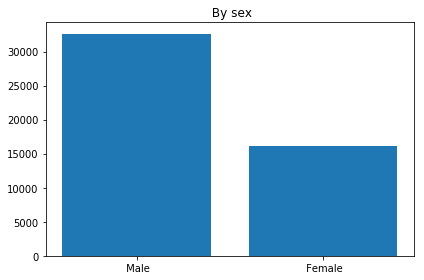

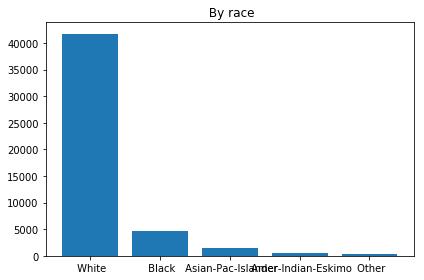

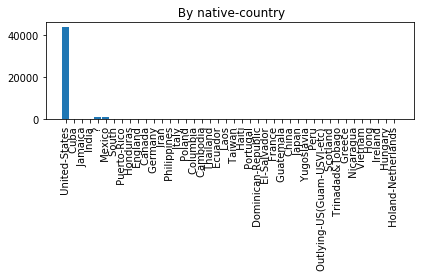

In [5]:
features = ['sex', 'race', 'native-country']
for index, feature in enumerate(features):
    plot_categs(data, feature, fignum=index+1)

# Education Level and Occupation

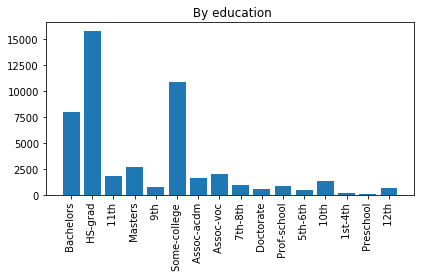

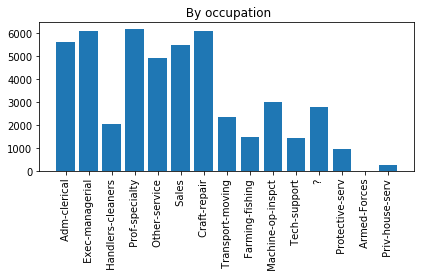

In [6]:
other_features = ['education', 'occupation']
for index, feature in enumerate(other_features):
    plot_categs(data, feature, fignum=index+1)

# Salary

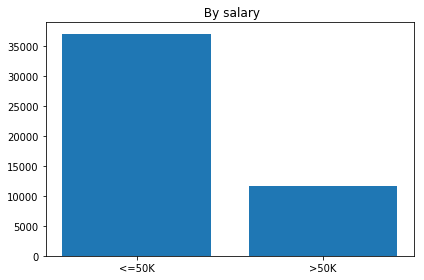

In [7]:
plot_categs(data, 'salary')

# Exploring gender bias in the dataset

In [8]:
# Examining statistics among_demographics
male_data = data[data.sex == ' Male']
female_data = data[data.sex == ' Female']

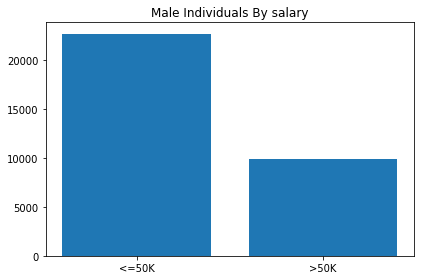

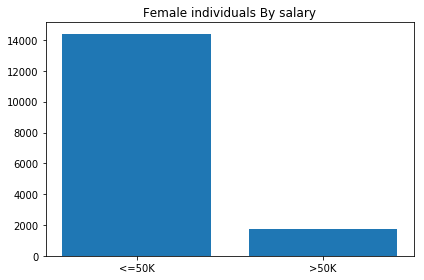

In [9]:
plot_categs(male_data, 'salary', fignum=1,title="Male Individuals")
plot_categs(female_data, 'salary', fignum=2, title="Female individuals")

## Exploring racial bias in the dataset 

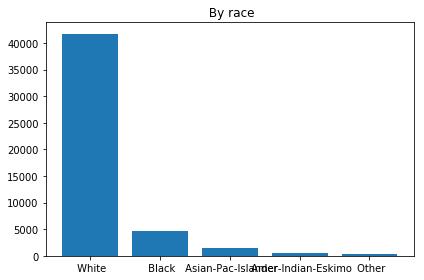

In [10]:
# Examine races in the dataset
plot_categs(data, 'race')

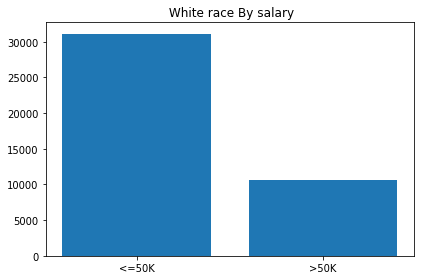

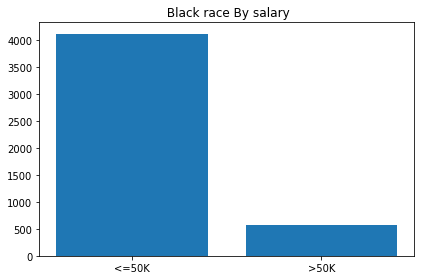

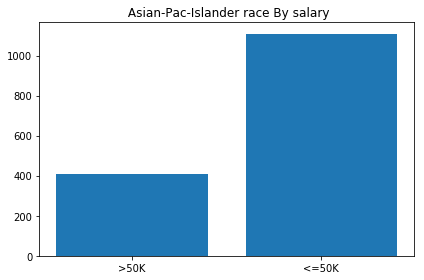

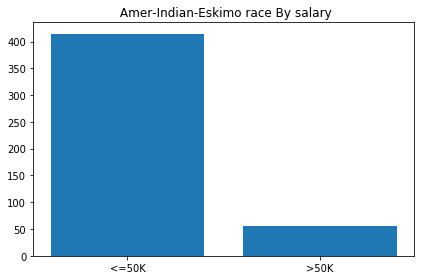

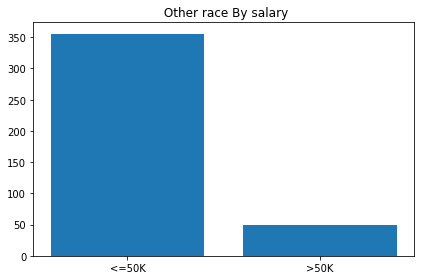

In [11]:
unique_races = data['race'].unique()
for index, race in enumerate(unique_races):
    plot_categs(data[data['race'] == race], 'salary', fignum=index, title = race+" race")

## Explore hours worked per week in demographics

In [12]:
def plot_categ_hists(df, feature, title=None, bins=None, histtype='bar', density=False, normed=None, fignum=1):
    plt.figure(fignum)
    x = df[feature]
    plt.hist(x, bins=bins, density=density, normed=normed, histtype=histtype)
    plt.xlabel(feature)
    plt.title(title if title is not None else '')

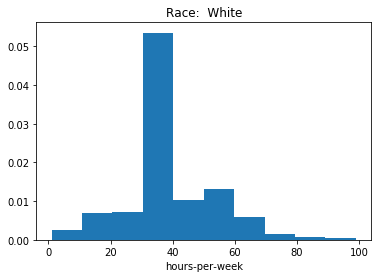

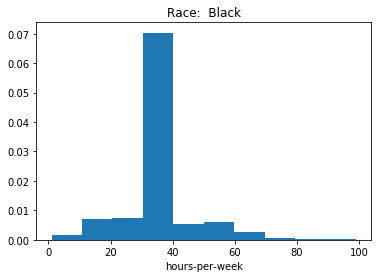

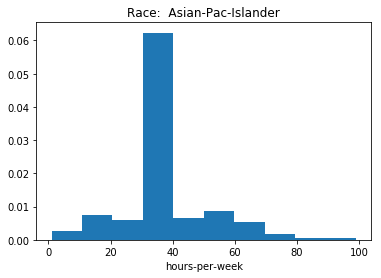

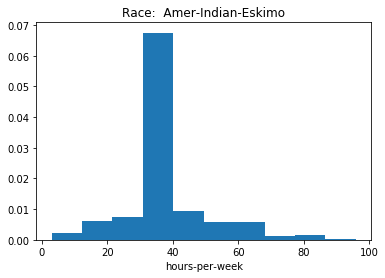

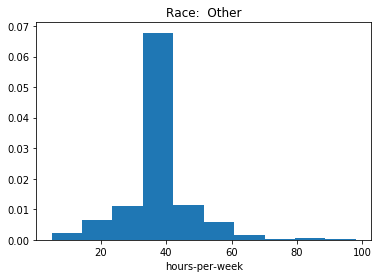

In [13]:
#Explore per race
unique_races = data.race.unique()
for index, race in enumerate(unique_races):
    plot_categ_hists(data[data.race==race], 'hours-per-week', fignum=index+1, title="Race: "+race, density=True)

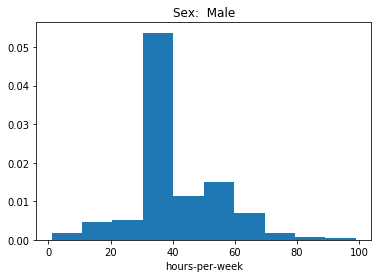

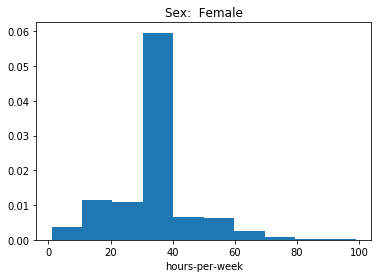

In [14]:
#Explore per gender
unique_sexes = data.sex.unique()
for index, sex in enumerate(unique_sexes):
    plot_categ_hists(data[data.sex==sex], 'hours-per-week', fignum=index+1, title="Sex: "+sex, density=True)

# Visualize correlations

In [15]:
def correlation_matrix(df, size=None):
    if size is None:
        size = df.columns.size
    correl = df.corr()
    figure, axes = plt.subplots(figsize=(size, size))
    axes.matshow(correl)
    plt.xticks(range(len(correl.columns)), correl.columns)
    plt.yticks(range(len(correl.columns)), correl.columns)
    plt.show()

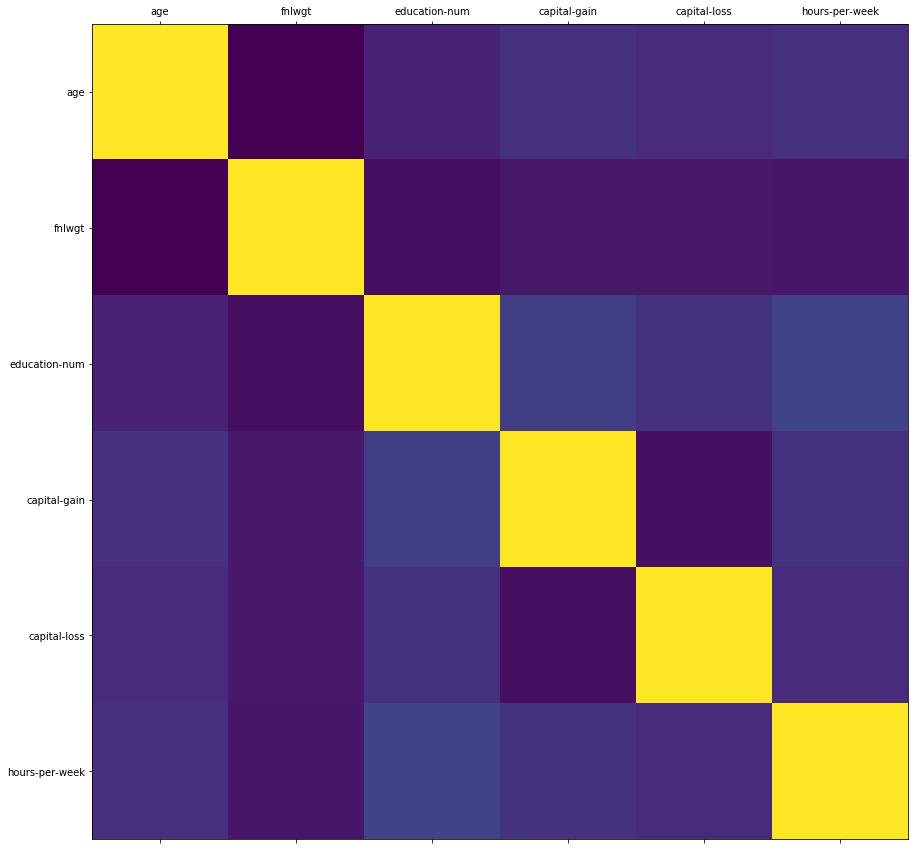

In [16]:
correlation_matrix(data, 15)

# Manipulating features for better understanding
This will help us understand values in terms of probabilities
Make the dataset ready for machine learning

In [17]:
datav2 = data.copy()

## Drop all missing values

In [18]:
datav2['native-country'].unique(), datav2['workclass'].unique(), datav2['occupation'].unique()

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
        ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
        ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
        ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
        ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
        ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
        ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
        ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
        ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object),
 array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Mach

In [19]:
features_with_empty_values = ['native-country', 'workclass', 'occupation']
for feature in features_with_empty_values:
    datav2[feature] = datav2[feature].replace(' ?', np.nan)
    
datav2.dropna(how='any', inplace=True)

In [20]:
datav2['native-country'].unique(), datav2['workclass'].unique(), datav2['occupation'].unique()

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
        ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
        ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
        ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
        ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
        ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
        ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
        ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
        ' Hungary', ' Holand-Netherlands'], dtype=object),
 array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repai

## Change country to US vs non-US

In [21]:
datav2[datav2['native-country'] == ' United-States'].shape

(41292, 15)

In [22]:
datav2.loc[datav2['native-country']!=' United-States', 'native-country'] = 'Non-US'
datav2.loc[datav2['native-country'] == ' United-States', 'native-country'] = 'US'


In [23]:
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,US,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,US,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,US,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,US,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Non-US,<=50K


## Convert salary to one-hot

In [24]:
datav2['salary'] = datav2['salary'].map({'>50K':1,'<=50K':0})

# Convert country and gender into integer

In [25]:
datav2['native-country'] = datav2['native-country'].map({'US':1,'Non-US':0}).astype(int)
datav2['sex'] = datav2['sex'].map({' Male':1,' Female':0})
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,1,2174.0,0.0,40.0,1,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,1,0.0,0.0,13.0,1,0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40.0,1,0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.0,0.0,40.0,1,0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.0,0.0,40.0,0,0


In [26]:
# Sex vs salary
datav2[['sex', 'salary']].groupby(['sex']).mean()

,salary
sex,
0,0.113576
1,0.312477


In [27]:
# native-country vs salary
datav2[['native-country', 'salary']].groupby(['native-country']).mean()

,salary
native-country,
0,0.193384
1,0.253027


In [28]:
datav2[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Divorced,0.104018
Married-AF-spouse,0.437500
Married-civ-spouse,0.454239
Married-spouse-absent,0.097826
Never-married,0.048020
Separated,0.070163
Widowed,0.094753


# Marital status is either single, or is a couple

We will categorize marital status into single or couple

In [29]:
datav2['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [30]:
datav2['marital-status'] = datav2['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
datav2['marital-status'] = datav2['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Single,Adm-clerical,Not-in-family,White,1,2174.0,0.0,40.0,1,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Couple,Exec-managerial,Husband,White,1,0.0,0.0,13.0,1,0
2,38,Private,215646.0,HS-grad,9.0,Single,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40.0,1,0
3,53,Private,234721.0,11th,7.0,Couple,Handlers-cleaners,Husband,Black,1,0.0,0.0,40.0,1,0
4,28,Private,338409.0,Bachelors,13.0,Couple,Prof-specialty,Wife,Black,0,0.0,0.0,40.0,0,0


In [31]:
datav2[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Couple,0.454213
Single,0.067537


In [32]:
datav2[['marital-status','relationship','salary']].groupby(['marital-status','relationship']).mean()

salary
marital-status relationship             
Couple          Husband         0.455748
                Not-in-family   0.263158
                Other-relative  0.151351
                Own-child       0.174603
                Wife            0.485892
Single          Not-in-family   0.104682
                Other-relative  0.018900
                Own-child       0.012769
                Unmarried       0.063074

In [33]:
datav2[['marital-status','relationship','salary']].groupby(['relationship','marital-status']).mean()

salary
relationship    marital-status          
 Husband        Couple          0.455748
 Not-in-family  Couple          0.263158
                Single          0.104682
 Other-relative Couple          0.151351
                Single          0.018900
 Own-child      Couple          0.174603
                Single          0.012769
 Unmarried      Single          0.063074
 Wife           Couple          0.485892

In [34]:
datav2['marital-status'] = datav2['marital-status'].map({'Couple':1,'Single':0})

In [35]:
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,0,Adm-clerical,Not-in-family,White,1,2174.0,0.0,40.0,1,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,1,Exec-managerial,Husband,White,1,0.0,0.0,13.0,1,0
2,38,Private,215646.0,HS-grad,9.0,0,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40.0,1,0
3,53,Private,234721.0,11th,7.0,1,Handlers-cleaners,Husband,Black,1,0.0,0.0,40.0,1,0
4,28,Private,338409.0,Bachelors,13.0,1,Prof-specialty,Wife,Black,0,0.0,0.0,40.0,0,0


In [36]:
## Map relationships to integers

In [37]:
rel_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}
datav2['relationship'] = datav2['relationship'].map(rel_map)
datav2.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,0,Adm-clerical,3,White,1,2174.0,0.0,40.0,1,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,1,Exec-managerial,2,White,1,0.0,0.0,13.0,1,0
2,38,Private,215646.0,HS-grad,9.0,0,Handlers-cleaners,3,White,1,0.0,0.0,40.0,1,0
3,53,Private,234721.0,11th,7.0,1,Handlers-cleaners,2,Black,1,0.0,0.0,40.0,1,0
4,28,Private,338409.0,Bachelors,13.0,1,Prof-specialty,1,Black,0,0.0,0.0,40.0,0,0
5,37,Private,284582.0,Masters,14.0,1,Exec-managerial,1,White,0,0.0,0.0,40.0,1,0
6,49,Private,160187.0,9th,5.0,0,Other-service,3,Black,0,0.0,0.0,16.0,0,0
7,52,Self-emp-not-inc,209642.0,HS-grad,9.0,1,Exec-managerial,2,White,1,0.0,0.0,45.0,1,1
8,31,Private,45781.0,Masters,14.0,0,Prof-specialty,3,White,0,14084.0,0.0,50.0,1,1
9,42,Private,159449.0,Bachelors,13.0,1,Exec-managerial,2,White,1,5178.0,0.0,40.0,1,1


##  Analyse race

In [38]:
datav2[['race','salary']].groupby('race').mean()

,salary
race,
Amer-Indian-Eskimo,0.121839
Asian-Pac-Islander,0.283193
Black,0.126301
Other,0.127479
White,0.262371


In [39]:
### Map race

In [40]:
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}


datav2['race']= datav2['race'].map(race_map)
    
datav2.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,0,Adm-clerical,3,0,1,2174.0,0.0,40.0,1,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,1,Exec-managerial,2,0,1,0.0,0.0,13.0,1,0
2,38,Private,215646.0,HS-grad,9.0,0,Handlers-cleaners,3,0,1,0.0,0.0,40.0,1,0
3,53,Private,234721.0,11th,7.0,1,Handlers-cleaners,2,3,1,0.0,0.0,40.0,1,0
4,28,Private,338409.0,Bachelors,13.0,1,Prof-specialty,1,3,0,0.0,0.0,40.0,0,0
5,37,Private,284582.0,Masters,14.0,1,Exec-managerial,1,0,0,0.0,0.0,40.0,1,0
6,49,Private,160187.0,9th,5.0,0,Other-service,3,3,0,0.0,0.0,16.0,0,0
7,52,Self-emp-not-inc,209642.0,HS-grad,9.0,1,Exec-managerial,2,0,1,0.0,0.0,45.0,1,1
8,31,Private,45781.0,Masters,14.0,0,Prof-specialty,3,0,0,14084.0,0.0,50.0,1,1
9,42,Private,159449.0,Bachelors,13.0,1,Exec-managerial,2,0,1,5178.0,0.0,40.0,1,1


In [41]:
datav2[['occupation', 'salary']].groupby(['occupation']).mean()

,salary
occupation,
Adm-clerical,0.136462
Armed-Forces,0.285714
Craft-repair,0.225083
Exec-managerial,0.479111
Farming-fishing,0.116216
Handlers-cleaners,0.065982
Machine-op-inspct,0.122896
Other-service,0.040765
Priv-house-serv,0.012931


In [42]:
datav2[['workclass', 'salary']].groupby(['workclass']).mean()

,salary
workclass,
Federal-gov,0.390469
Local-gov,0.295161
Private,0.217702
Self-emp-inc,0.554070
Self-emp-not-inc,0.278978
State-gov,0.267215
Without-pay,0.095238


In [43]:
def group_workclass(x):
    if x['workclass'] == ' Federal-gov' or x['workclass']== ' Local-gov' or x['workclass']==' State-gov': return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
    
datav2['employment_type']=datav2.apply(group_workclass, axis=1)
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,State-gov,77516.0,Bachelors,13.0,0,Adm-clerical,3,0,1,2174.0,0.0,40.0,1,0,govt
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,1,Exec-managerial,2,0,1,0.0,0.0,13.0,1,0,self_employed
2,38,Private,215646.0,HS-grad,9.0,0,Handlers-cleaners,3,0,1,0.0,0.0,40.0,1,0,private
3,53,Private,234721.0,11th,7.0,1,Handlers-cleaners,2,3,1,0.0,0.0,40.0,1,0,private
4,28,Private,338409.0,Bachelors,13.0,1,Prof-specialty,1,3,0,0.0,0.0,40.0,0,0,private


In [44]:
datav2[['employment_type', 'salary']].groupby(['employment_type']).mean()

,salary
employment_type,
govt,0.307502
private,0.217702
self_employed,0.362183
without_pay,0.095238


In [45]:
datav2[['education','salary']].groupby(['education']).mean()

,salary
education,
10th,0.067048
11th,0.054972
12th,0.074523
1st-4th,0.036036
5th-6th,0.048998
7th-8th,0.066829
9th,0.056213
Assoc-acdm,0.264101
Assoc-voc,0.257274


In [46]:
employment_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}

datav2['employment_type'] = datav2['employment_type'].map(employment_map)
datav2.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,State-gov,77516.0,Bachelors,13.0,0,Adm-clerical,3,0,1,2174.0,0.0,40.0,1,0,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,1,Exec-managerial,2,0,1,0.0,0.0,13.0,1,0,2
2,38,Private,215646.0,HS-grad,9.0,0,Handlers-cleaners,3,0,1,0.0,0.0,40.0,1,0,1
3,53,Private,234721.0,11th,7.0,1,Handlers-cleaners,2,3,1,0.0,0.0,40.0,1,0,1
4,28,Private,338409.0,Bachelors,13.0,1,Prof-specialty,1,3,0,0.0,0.0,40.0,0,0,1
5,37,Private,284582.0,Masters,14.0,1,Exec-managerial,1,0,0,0.0,0.0,40.0,1,0,1
6,49,Private,160187.0,9th,5.0,0,Other-service,3,3,0,0.0,0.0,16.0,0,0,1
7,52,Self-emp-not-inc,209642.0,HS-grad,9.0,1,Exec-managerial,2,0,1,0.0,0.0,45.0,1,1,2
8,31,Private,45781.0,Masters,14.0,0,Prof-specialty,3,0,0,14084.0,0.0,50.0,1,1,1
9,42,Private,159449.0,Bachelors,13.0,1,Exec-managerial,2,0,1,5178.0,0.0,40.0,1,1,1


In [47]:
datav2.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
datav2.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,77516.0,13.0,0,3,0,1,2174.0,0.0,40.0,1,0,0
1,50,83311.0,13.0,1,2,0,1,0.0,0.0,13.0,1,0,2
2,38,215646.0,9.0,0,3,0,1,0.0,0.0,40.0,1,0,1
3,53,234721.0,7.0,1,2,3,1,0.0,0.0,40.0,1,0,1
4,28,338409.0,13.0,1,1,3,0,0.0,0.0,40.0,0,0,1
5,37,284582.0,14.0,1,1,0,0,0.0,0.0,40.0,1,0,1
6,49,160187.0,5.0,0,3,3,0,0.0,0.0,16.0,0,0,1
7,52,209642.0,9.0,1,2,0,1,0.0,0.0,45.0,1,1,2
8,31,45781.0,14.0,0,3,0,0,14084.0,0.0,50.0,1,1,1
9,42,159449.0,13.0,1,2,0,1,5178.0,0.0,40.0,1,1,1


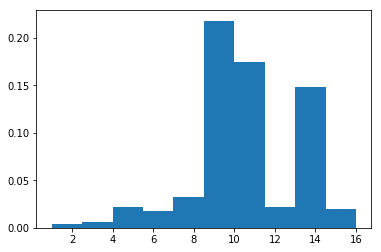

In [48]:
x= datav2['education-num']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

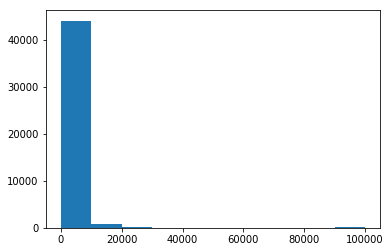

In [49]:
x=datav2['capital-gain']
plt.hist(x,bins=None,normed=None)
plt.show()

In [50]:
datav2.loc[(datav2['capital-gain'] > 0),'capital-gain'] = 1
datav2.loc[(datav2['capital-gain'] == 0 ,'capital-gain')]= 0
datav2.head(25)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,77516.0,13.0,0,3,0,1,1.0,0.0,40.0,1,0,0
1,50,83311.0,13.0,1,2,0,1,0.0,0.0,13.0,1,0,2
2,38,215646.0,9.0,0,3,0,1,0.0,0.0,40.0,1,0,1
3,53,234721.0,7.0,1,2,3,1,0.0,0.0,40.0,1,0,1
4,28,338409.0,13.0,1,1,3,0,0.0,0.0,40.0,0,0,1
5,37,284582.0,14.0,1,1,0,0,0.0,0.0,40.0,1,0,1
6,49,160187.0,5.0,0,3,3,0,0.0,0.0,16.0,0,0,1
7,52,209642.0,9.0,1,2,0,1,0.0,0.0,45.0,1,1,2
8,31,45781.0,14.0,0,3,0,0,1.0,0.0,50.0,1,1,1
9,42,159449.0,13.0,1,2,0,1,1.0,0.0,40.0,1,1,1


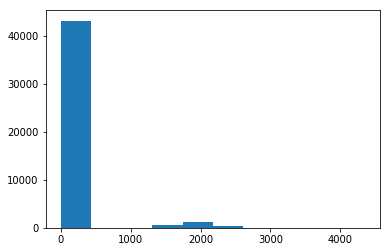

In [51]:
x=datav2['capital-loss']
plt.hist(x,bins=None)
plt.show()

In [52]:
datav2.loc[(datav2['capital-loss'] > 0),'capital-loss'] = 1
datav2.loc[(datav2['capital-loss'] == 0 ,'capital-loss')]= 0
datav2.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,77516.0,13.0,0,3,0,1,1.0,0.0,40.0,1,0,0
1,50,83311.0,13.0,1,2,0,1,0.0,0.0,13.0,1,0,2
2,38,215646.0,9.0,0,3,0,1,0.0,0.0,40.0,1,0,1
3,53,234721.0,7.0,1,2,3,1,0.0,0.0,40.0,1,0,1
4,28,338409.0,13.0,1,1,3,0,0.0,0.0,40.0,0,0,1
5,37,284582.0,14.0,1,1,0,0,0.0,0.0,40.0,1,0,1
6,49,160187.0,5.0,0,3,3,0,0.0,0.0,16.0,0,0,1
7,52,209642.0,9.0,1,2,0,1,0.0,0.0,45.0,1,1,2
8,31,45781.0,14.0,0,3,0,0,1.0,0.0,50.0,1,1,1
9,42,159449.0,13.0,1,2,0,1,1.0,0.0,40.0,1,1,1


In [53]:
datav2['age'].count()

45222

# Apply Machine Learning model for prediction

Divide data into training, validatin and test dataset

50% training data, 20% validation data, 30% test data

In [54]:
import math, random
def shuffled_df(df, random_state = 1):
    """
    Return randomly shufled dataframe
    """
    df_copy = df.copy()
    ## Get shuffled sample of size 100%
    df_copy.sample(frac=1, random_state=random_state).reset_index(drop=True)
    return df_copy

def split_df(X, y, train_size=.5):
    """
    Return Xtrain, Ytrain, Xtest, Ytest. No randomization
    """
    assert X.shape[0] == y.shape[0], "Unequal number of datapoints"
    nrows, ncols = X.shape
    ntrain = math.floor(train_size*nrows)
    Xtrain, Xtest = X[:ntrain], X[ntrain:]
    Ytrain, Ytest = y[:ntrain], y[ntrain:]
    return Xtrain, Xtest, Ytrain, Ytest

In [55]:
data_shuffled = shuffled_df(datav2)
X = data_shuffled.drop(['salary'], axis=1)
y = data_shuffled['salary']
train_size = 0.7
Xtrain, Xtest, Ytrain, Ytest = split_df(X, y, train_size =0.7)
Xtrain, Xval, Ytrain, Yval = split_df(Xtrain, Ytrain, train_size=0.8)



In [56]:
print ("Train dataset: {0}{1}".format(Xtrain.shape, Ytrain.shape))
print ("Validation dataset: {0}{1}".format(Xval.shape, Yval.shape))
print ("Test dataset: {0}{1}".format(Xtest.shape, Ytest.shape))

Train dataset: (25324, 12)(25324,)
Validation dataset: (6331, 12)(6331,)
Test dataset: (13567, 12)(13567,)


In [57]:
# Let's select algorithms for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

/Users/audace/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [58]:
models = []
names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM',]

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))

In [59]:
print(models)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_s

In [60]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [61]:
kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],Xtrain,Ytrain,cv=kfold,scoring='accuracy')
    
    score=models[i].fit(Xtrain,Ytrain)
    prediction = models[i].predict(Xval)
    acc_score = accuracy_score(Yval,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

----------------------------------------
LR: 0.7464855473069025
----------------------------------------
Random Forest: 0.8169325540988785
----------------------------------------
Neural Network: 0.7468014531669562
----------------------------------------
GaussianNB: 0.7760227452219238
----------------------------------------
DecisionTreeClassifier: 0.7774443215921656
----------------------------------------
SVM: 0.7466435002369294


In [62]:
# Let's predicts our test data and see our prediction results

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [64]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(Xtrain,Ytrain)
prediction = randomForest.predict(Xtest)

In [65]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(Ytest,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(Ytest,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(Ytest,prediction))

----------------------------------------
Accuracy score:
0.822141962113953
----------------------------------------
Confusion Matrix:
[[9268  976]
 [1437 1886]]
----------------------------------------
Classification Matrix:
             precision    recall  f1-score   support

          0       0.87      0.90      0.88     10244
          1       0.66      0.57      0.61      3323

avg / total       0.82      0.82      0.82     13567



# Evaluating Algorithm's performance accross different features

In [66]:
Xtrain.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,employment_type
0,39,77516.0,13.0,0,3,0,1,1.0,0.0,40.0,1,0
1,50,83311.0,13.0,1,2,0,1,0.0,0.0,13.0,1,2
2,38,215646.0,9.0,0,3,0,1,0.0,0.0,40.0,1,1
3,53,234721.0,7.0,1,2,3,1,0.0,0.0,40.0,1,1
4,28,338409.0,13.0,1,1,3,0,0.0,0.0,40.0,0,1


In [67]:
df_testdata = Xtest.copy()
df_testdata['salary'] = Ytest
df_testdata.shape, prediction.shape

((13567, 13), (13567,))

In [68]:
df_testdata.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,employment_type,salary
34178,19,223669.0,7.0,0,4,0,1,0.0,0.0,20.0,1,1,0
34179,47,182177.0,10.0,0,0,0,0,0.0,0.0,23.0,1,1,0
34180,24,109414.0,10.0,0,5,2,1,0.0,0.0,20.0,0,1,0
34181,55,150917.0,10.0,1,2,0,1,0.0,1.0,45.0,1,2,1
34182,61,39128.0,9.0,1,2,0,1,0.0,0.0,35.0,1,2,0


In [82]:
pred_df = pd.Series(prediction, index=df_testdata.index)
df_testdata['pred'] = pred_df

## Performance accross gender

In [85]:
df_testdata['accurate'] = (df_testdata['pred'] == df_testdata['salary'])
df_testdata.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,employment_type,salary,pred,accurate
34178,19,223669.0,7.0,0,4,0,1,0.0,0.0,20.0,1,1,0,0,True
34179,47,182177.0,10.0,0,0,0,0,0.0,0.0,23.0,1,1,0,0,True
34180,24,109414.0,10.0,0,5,2,1,0.0,0.0,20.0,0,1,0,0,True
34181,55,150917.0,10.0,1,2,0,1,0.0,1.0,45.0,1,2,1,1,True
34182,61,39128.0,9.0,1,2,0,1,0.0,0.0,35.0,1,2,0,0,True


In [106]:
(df_testdata.accurate).mean()

0.822141962113953

In [119]:
# Accuracy accross gender
for gender in [(0, "Female"), (1, "Male")]:
    rows = df_testdata[df_testdata.sex==gender[0]]
    print("P(ACCURATE|gender=", gender[1], "): ", rows.accurate.mean())

P(ACCURATE|gender= Female ):  0.9121743036837376
P(ACCURATE|gender= Male ):  0.7781678551837631


In [120]:
# Loan chance given gender
for gender in [(0, "Female"), (1, "Male")]:
    rows = df_testdata[df_testdata.sex==gender[0]]
    print("P(HIGH_INCOME | gender=", gender[1], "): ", (rows['pred'] ==1).mean())

P(HIGH_INCOME | gender= Female ):  0.08423180592991913
P(HIGH_INCOME | gender= Male ):  0.27284695556774546


Why?

In [131]:
for gender in [(0, "Female"), (1, "Male")]:
    rows = df_testdata[df_testdata.sex==gender[0]]
    high_income = rows[rows.salary==1]
    low_income=rows[rows.salary==0]
    print(str.format("P(ACCURATE|(HIGH,{0})", gender[1]), ": ",high_income.accurate.mean())
    print(str.format("P(ACCURATE|(LOW,{0})", gender[1]), ":",low_income.accurate.mean())
    

P(ACCURATE|(HIGH,Female)   0.48406374501992033
P(ACCURATE|(LOW,Female)   0.9665822784810126
P(ACCURATE|(HIGH,Male)   0.5824175824175825
P(ACCURATE|(LOW,Male)   0.8659040355894503


In [132]:
# TODO(Plot visualizations)

## Understanding the problem

- Given 2 people, a male and a female, with high real income,:
    - The algorithm predicts the male is more likely to have high income
    - i.e The algorithm is **favoring the male**
- Given 2 people, a male and a female, with low real income:
    - The algorithm is more likely to predict the female is more likely to have low income
    - The algorithm is still **favoring the male**

** Interpretation **:
    - The algorithm has inherited gender-based discrimination from the data it was trained on

# Mitigating algorithmic bias